# Chapter 3 (con't): Graphics and Visualization
## Scatter Plots (Section 3.2)
* In the graphs shown in the last lecture, we inspected functions with respect to some variable.
* However, what if we have experimental data that don't have some clear trend, or if the data are unordered?
* We can use scatter plots to visualize these types of data, which represent each data point with a single marker, like a dot or square.

* First let's make two small arrays of random data and plot a scatter plot of them.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (6,4)  # in inches
rcParams['font.size'] = 16

Generate random numbers

In [3]:
Npts = 1000  # Number of random points
x = random.random(Npts)
y = random.random(Npts)

* Plot them using `scatter()`
* We first create an empty figure with `plt.subplots()` that returns a figure object and an axes object.
* We then can use the axes object to make our plot.
* We create the figure in this manner, unlike the previous lecture, because we want to gradually add onto the figure in subsequent programming blocks.

(0.0, 1.0)

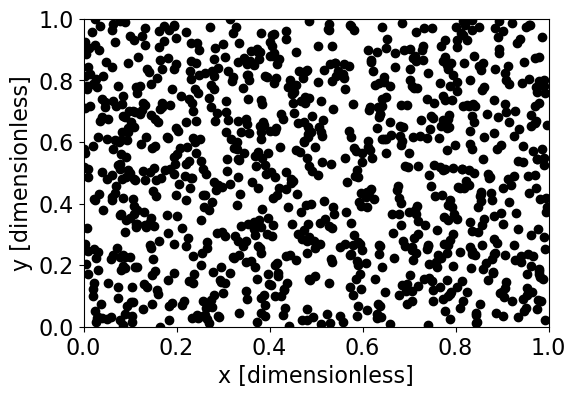

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y, c='k', marker='o')
plt.xlabel('x [dimensionless]')
plt.ylabel('y [dimensionless]')
plt.xlim(0,1)
plt.ylim(0,1)

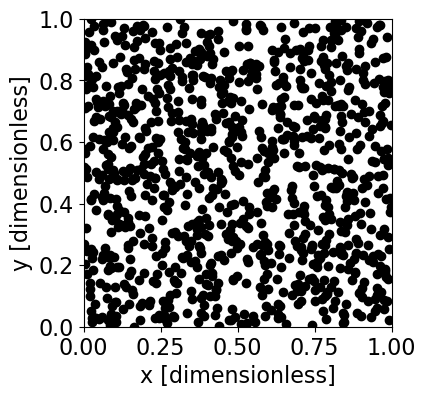

In [13]:
ax.set_aspect('equal')
fig

* We can do other things, like draw vertical lines with `axvline()` and horizontal lines with `axhline()`
* We can also draw filled regions with `fill()`
* *Note:* If you want to start over with a new plot, you can clear the current figure with `plt.clf()`.  We won't do this here because we're building on top of the previous figure.
* Below, we will be plotting the mean and standard deviation of the random points.
* Because we're working on the figure variable `fig`, we don't use `show()`.  Instead, we just have to type `fig` (the variable) to display the current figure.

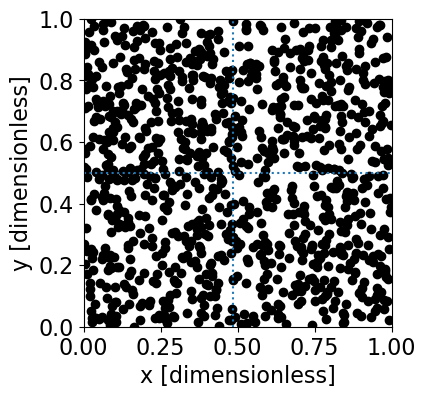

In [14]:
xmean = x.mean()
ymean = y.mean()
ax.axvline(xmean, ls=':')
ax.axhline(ymean, ls=':')
fig.set_facecolor('white')
fig

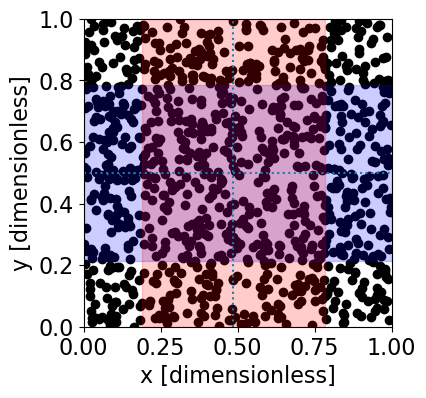

In [15]:
xsigma = x.std()
ysigma = y.std()
ax.axhspan(ymean-ysigma, ymean+ysigma, color='b', alpha=0.2)
ax.axvspan(xmean-xsigma, xmean+xsigma, color='r', alpha=0.2)
fig

In [16]:
print("The x-data have a mean and standard deviation of %.3f +/- %.3f" % (xmean, xsigma))
print("The y-data have a mean and standard deviation of %.3f +/- %.3f" % (ymean, ysigma))

The x-data have a mean and standard deviation of 0.486 +/- 0.297
The y-data have a mean and standard deviation of 0.501 +/- 0.286


In [17]:
plt.savefig('random-scatter.png')

<Figure size 600x400 with 0 Axes>

* Let's plot some actual data now in a scatter plot.
* In the file named `stars.txt`, there exists two columns that contain the surface temperature (in Kelvin) and apparent magnitude of nearby stars.
* First, we'll read the file with `np.loadtxt()` and then make a scatter plot of them.
* Before anything, we must clear the figure with `plt.clf()`.

In [18]:
plt.clf()
# Alternatively, one can make a new figure.
#fig, ax = plt.subplots()
data = np.loadtxt("stars.txt")
print("Read %d datapoints" % (data.shape[0]))
temperature = data[:,0]
magnitude = data[:,1]

Read 7860 datapoints


<Figure size 600x400 with 0 Axes>

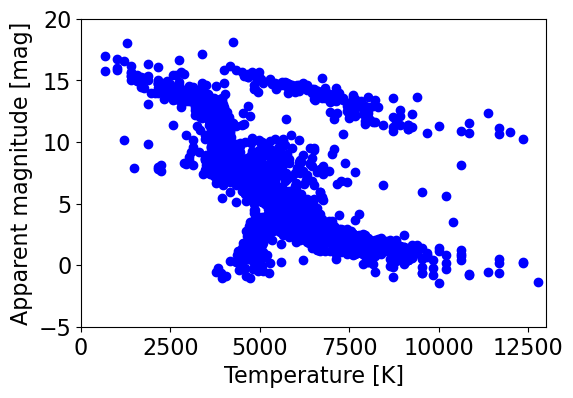

In [19]:
plt.scatter(temperature, magnitude, c="b", marker="o")
plt.xlabel("Temperature [K]")
plt.ylabel("Apparent magnitude [mag]")
plt.xlim(0, 13000)
plt.ylim(-5, 20)
plt.show()

The dots are pretty crowded in the "main sequence" of the so-called Hertzspring-Russell diagram.  We can lessen this effect by plotting dots instead of circles with some transparency (alpha).

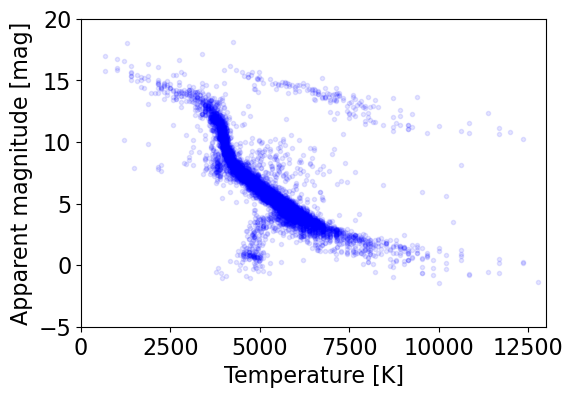

In [20]:
plt.scatter(temperature, magnitude, c="b", marker=".", alpha=0.1)
plt.xlabel("Temperature [K]")
plt.ylabel("Apparent magnitude [mag]")
plt.xlim(0, 13000)
plt.ylim(-5, 20)
plt.show()

In astronomy, magnitudes are usually plotted from positive (dim) to negative (bright) in the y-axis and from hot (blue) to cold (red).  We can flip the axes by changing the axis limits.

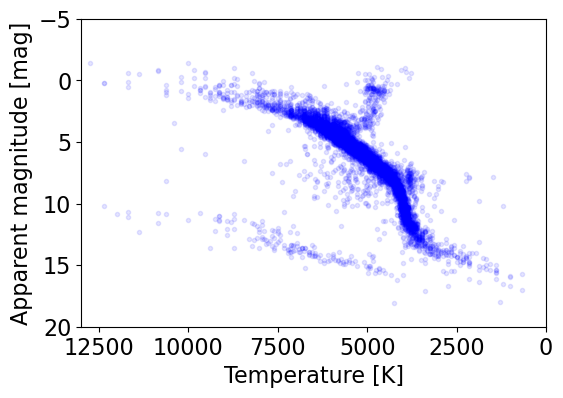

In [21]:
plt.scatter(temperature, magnitude, c="b", marker=".", alpha=0.1)
plt.xlabel("Temperature [K]")
plt.ylabel("Apparent magnitude [mag]")
plt.xlim(13000, 0)
plt.ylim(20, -5)
plt.show()

## Density Plots (Section 3.3)
* There are many instances where one has a 2-dimensional function.
    * For example, a fluid dynamicist might measure the heights of waves in a ripple tank, or 
    * a particle physicist might measure the distribution of particles incident on an imaging detector.
* From these data, we can make a density plot, in which we color each pixel with the functional value.
* For density plots, we will use the matplotlib function `imshow`
* First, let's read in some data from the file `circular.txt`

In [22]:
data = np.loadtxt("circular.txt")
print("Read in data with a shape %s" % (data.shape,))

Read in data with a shape (501, 501)


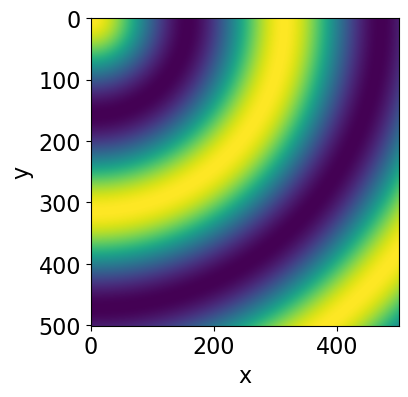

In [23]:
plt.imshow(data)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

* `imshow` will automatically scale the colors to the minimum and maximum of the data.
* Furthermore, it will place the origin in the upper-left hand corner, which is the standard for computer graphics.
* However for physics simulations and calculations, we usually want the origin to exist in the lower-left hand corner.  To do this, we specify the argument to `imshow`, `origin="lower"`.
* Additionally, we can change the colormap to something else.  There are many available colormaps, which can be found here: http://matplotlib.org/examples/color/colormaps_reference.html

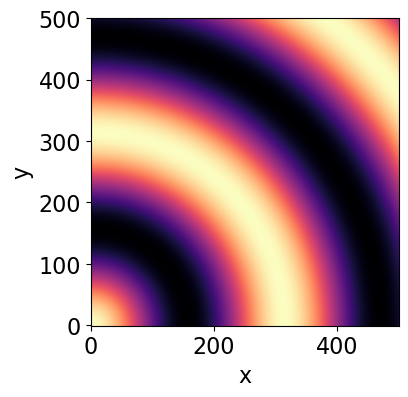

In [24]:
plt.imshow(data, origin="lower", cmap="magma")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

* `imshow()` displays the axes in terms of pixel count.
* What if we want to change the axes to show variables in some other scale?
* Then, we can specify the argument `extent=` in the `imshow()` call, which will rescale the axes to `[xmin, xmax, ymin, ymax]`.

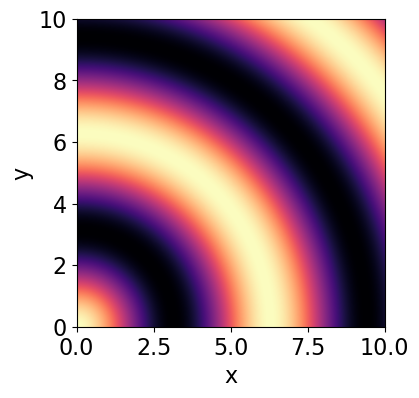

In [26]:
plt.imshow(data, origin="lower", cmap="magma", extent=[0,10,0,10])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can easily add a colorbar to the plot with `colorbar()`.

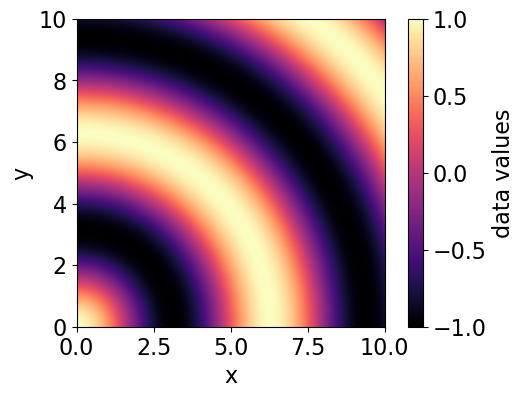

In [27]:
plt.imshow(data, origin="lower", cmap="magma", extent=[0,10,0,10])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="data values")
plt.show()

## Example 3.1: Wave interference
* Suppose we drop a pebble in a pond and waves radiate out from its impact point.
* We can create a simple representation of this model with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time.
* If the circle center is at $(x_1, y_1)$, then the distance $r_1$ to the center from a point $(x,y)$ is
\begin{equation}
r_1 = \sqrt{ (x-x_1)^2 + (y-y_1)^2 }
\end{equation}
* and the sine wave for the height is
\begin{equation}
\xi_1(x,y) = \xi_0 \sin kr_1,
\end{equation}
* where $\xi_0$ is the amplitude of the waves and $k$ is the wavevector, related to the wavelength $\lambda$ by $k = 2\pi/\lambda$.

* Suppose we drop another pebble at $(x_2, y_2)$ that creates a wave pattern exactly the same as the first pebble.
* Its circular waves will obey
\begin{equation}
\xi_2(x,y) = \xi_0 \sin kr_2
\quad\textrm{with}\quad
r_2 = \sqrt{ (x-x_2)^2 + (y-y_2)^2 }
\end{equation}
* Therefore the **total height** of the surface at some point $(x,y)$ is
\begin{equation}
\xi(x,y) = \xi_0 (\sin kr_1 + \sin kr_2)
\end{equation}

Let's now write a program with array arithmetic (unlike the book) that calculates and graphs $\xi$.
* Take $\lambda = 5$ cm, $\xi_0 = 1$ cm, and the centers are 20 cm apart.
* We will graph the total height of the waves in a square region with 1 m on a side.
* We will consider a region with $500 \times 500$ cells
* First, let's define our parameters of the system.

In [29]:
wavelength = 5.0  # cm
k = 2*np.pi / wavelength
xi0 = 1.0  # cm
separation = 20.0  # separation of centers in cm
side = 100.  # Side of the domain in cm
points = 500  # Number of grid points along each side
spacing = side/points  # spacing of points in cm

* Now let's create the domain
* `mgrid()` is a convienence function that creates a grid of coordinate values from `a` to `b` with a spacing of `c` in the syntax `np.mgrid[a:b:c]`.
* If `c` is a complex number, then `c` points will be created between `a` and `b`.

In [30]:
y, x = np.mgrid[0:side:spacing, 0:side:spacing]
print(x.shape)
print(x)

(500, 500)
[[ 0.   0.2  0.4 ... 99.4 99.6 99.8]
 [ 0.   0.2  0.4 ... 99.4 99.6 99.8]
 [ 0.   0.2  0.4 ... 99.4 99.6 99.8]
 ...
 [ 0.   0.2  0.4 ... 99.4 99.6 99.8]
 [ 0.   0.2  0.4 ... 99.4 99.6 99.8]
 [ 0.   0.2  0.4 ... 99.4 99.6 99.8]]


* Now let's calculate the circle centers, which will be `separation/2` away from the domain center in the x-axis.

In [34]:
x1 = 0.5*side - 0.5*separation
y1 = 0.5*side
x2 = 0.5*side + 0.5*separation
y2 = y1

* We can calculate the distance between each point in the lattice and the circle centers with some array arithmetic.

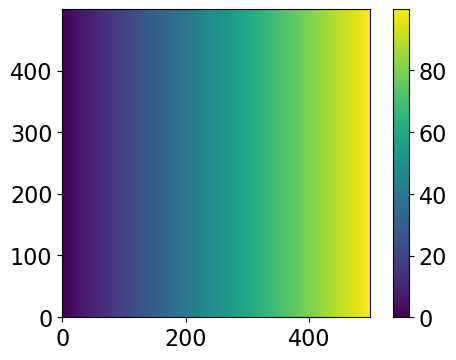

In [32]:
plt.imshow(x, origin="lower")
plt.colorbar()

In [35]:
r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
r2 = np.sqrt((x-x2)**2 + (y-y2)**2)

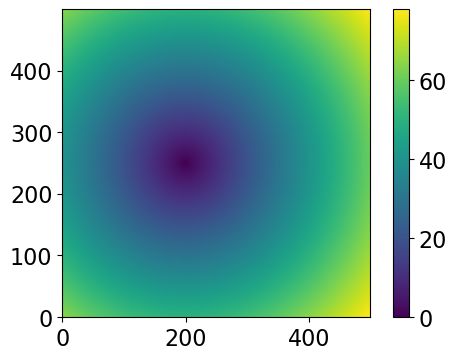

In [36]:
plt.imshow(r1, origin="lower")
plt.colorbar()
plt.show()

With the distances, we can finally calculate the wave pattern of the two pebbles being dropped.

In [37]:
xi = xi0 * (np.sin(k*r1) + np.sin(k*r2))

Now we can finally plot it!

In [38]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,6)  # in inches
rcParams['font.size'] = 16

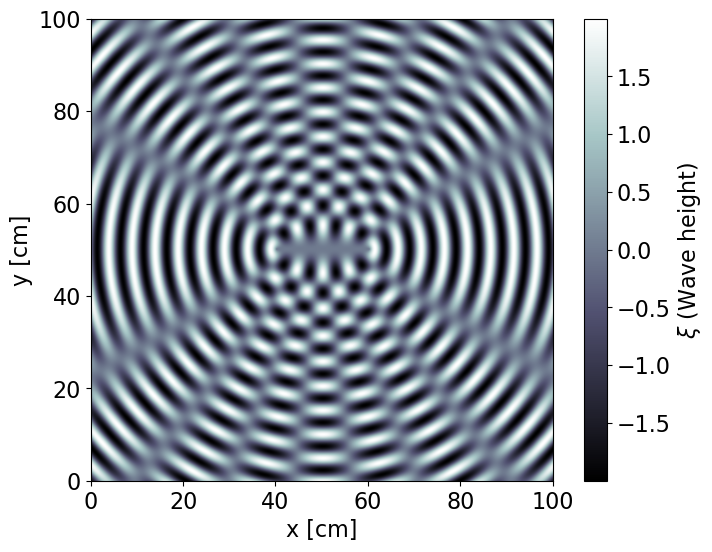

In [39]:
plt.imshow(xi, origin="lower", cmap="bone", extent=[0,side,0,side])
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.colorbar(label=r'$\xi$ (Wave height)')
plt.show()